In [1]:
%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

## Financial Network Models with Python
  []()

### Miguel Vaz
  []()

#### For Python Quants Conference
NYC, 6$^{th}$ of May 2016

http://fpq.io

https://github.com/mvaz/FPQ2016

# About me

@migueljvaz

- Risk Management (Consulting)
   * d-fine GmbH (2012 - )
- Software Developer
   * 360 Trading Networks (2010-2012)
- PhD in Robotics at the Honda Research Institute
  - once I saw ASIMO naked (!)

<div class="col-xs-1"><h1>I</h1></div>
<div class="col-xs-2">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f1/Heart_coraz%C3%B3n.svg/75px-Heart_coraz%C3%B3n.svg.png"/>
</div>
<div class="col-xs-6"><h1>networks</h1></div>

# Why?

### Networks give us a way to quantify and reason about concepts that are already familiar to us.

"New York is a financial **hub**"

"Ebola is a **contagious** disease"

"Lehman was too **central** to be let fail"

### Networks are great for representing structure¶

... and structure reveals much

![](pics/organisation.png)

http://www.bonkersworld.net/organizational-charts/

# Financial Structure: Central Clearing 

Obligation for certain types of contracts introduced by the "European Market Infrastructure Regulation (EMIR)", and "Dodd–Frank Wall Street Reform and Consumer Protection Act".

![](pics/clearing.png)

## Changes the network structure of the system

### From
![](pics/counterparties_fully_connected.png)


### To
![](pics/counterparties_clearing.png)

### Engaging visualizations

Usage of spatial representations makes use of our visual capabilities.

# Some vocabulary


A graph is a set of nodes and edges between them

$$G = (V, E)$$

The adjacency matrix of $G$ is given by
$$A_{i,j}:=
\begin{cases}
w(i,j) & \mbox{if}\ i \neq j \mbox{and}\ v_i \mbox{ is adjacent to } v_j \\
0 & \mbox{otherwise}
\end{cases}
$$



## Undirected, unweighted graph
![](pics/undirected.png)

In [22]:
import networkx as nx
g = nx.Graph()
g.add_path((1,2,3,4,5,3))
g.add_path((8,7,5,6,7))

<IPython.core.display.Javascript object>


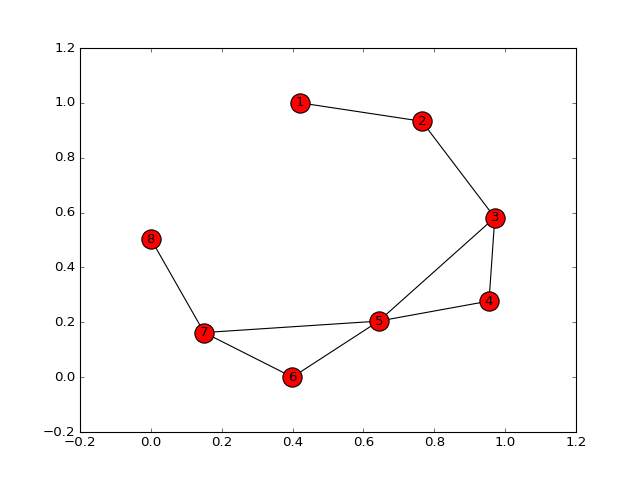

In [24]:
%matplotlib notebook
nx.draw_networkx(g)

## Undirected, unweighted graph
![](pics/directed.png)

In [31]:
g = nx.DiGraph()
g.add_path((8,7,6,5,3,2))
g.add_edges_from(((1,2), (4,3),(4,5),(7,5)))

<IPython.core.display.Javascript object>


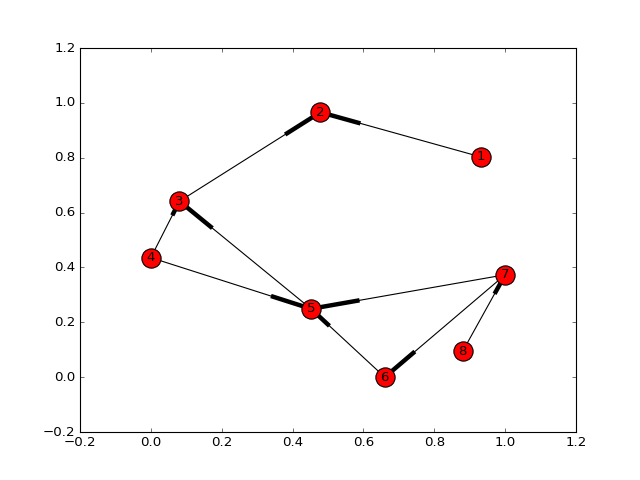

In [33]:
%matplotlib notebook
nx.draw_networkx(g)

## Weighted, directed graph
![](pics/weighted.png)

In [39]:
nx.from_numpy_matrix?

In [66]:
import numpy as np, six
adj = np.zeros((8,8))
adj[0,1] = .8
adj[2,1] = .7
adj[3,2] = .2
adj[3,4] = .6
adj[4,2] = .5
adj[5,4] = .7
adj[6,4] = .3
adj[6,5] = .9
adj[7,6] = 1.
g = nx.from_numpy_matrix(adj, create_using=nx.DiGraph())

In [67]:
nx.betweenness_centrality(g)

{0: 0.0,
 1: 0.0,
 2: 0.11904761904761904,
 3: 0.0,
 4: 0.14285714285714285,
 5: 0.0,
 6: 0.09523809523809523,
 7: 0.0}

<IPython.core.display.Javascript object>


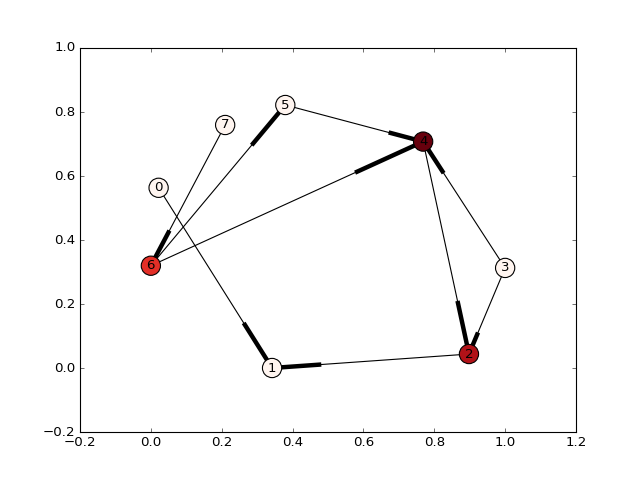

In [93]:
%matplotlib notebook
import matplotlib.pyplot as plt
nx.draw_networkx(g, cmap=plt.get_cmap('Reds'), node_color=list(nx.betweenness_centrality(g).values()))

# Centrality

## Bipartite network

Bipartite graphs $B = (U, V, E)$ have two node sets $U,V$ and edges in $E$ that only connect nodes from opposite sets

# Networks in Python


### NetworkX
    - https://networkx.github.io/
    - based on dictionaries
    - large set of centrality measures and algorithms
    - simple usage, ideal for small and middle-sized graphs

### igraph-python
    - based on the C library 'igraph'
    - same interface as for R
    - 

### Graph-Tool
    - https://graph-tool.skewed.de/
    - based heavily on the C++ Boost Graph Library
    - large set of features and algorithms
    - ideal for larger graphs (not "big data"-style)
    - in my experience, difficult to install

# Network models in Finance

Two major use-cases:
- Counterparty structure
- Agent-based models
- Structural inference: network of random variables

## Counterparty structure: large credit portfolio

Exposure to some obligors may be larger than could be expected, because the equity structure implies a loss to a given obligor if another defaults.

Diagram only considers equity structure.

![](pics/credit_portfolio.svg.png)

TODO:
    show distribution of weights
    show bipartite plot
    show portfolio overlap

    
Emphasize the granularity 

# Correlation networks

Correlation networks stem from the correlation matrix

![](pics/method.png)

## Eigenvectors of correlation matrix of DAX 30

Eigenvectors of the correlation matrix indicate whether 

![](pics/correlation_eigenvector.png)

# Empirical estimation of "true" correlation structure 

Estimating the "true" correlation of assets from empirical data is problematic:
- noise dominates the measurements (e.g. false positives)
- for large matrices, more variables than observations

[Mantegna 1999] showed that, when calculating the MST using a distance metric derived from the correlation
- the resulting tree is economically meaningful
- the ultrametric distance is stable


Mantegna 1999, "Hierarchical structure in financial markets", R. N. Mantegna, 1999, The European Physical Journal B - Condensed Matter and Complex Systems  Volume 11, Issue 1 , pp 193-197 


On clustering financial time series: a need for distances between dependent random variables
Gautier Marti et al. arXiv, 2016, vol. q-fin.ST

# Filtering: Threshold based methods

Removal of all elements that are smaller than a given value.

What should this value be?

- Bonferroni Correction

- Arbitrary threshold

$$ x = x + 1 $$

# Filtering: Random Matrix Theory

Reconstruct based on the eigenvectors whose eigenvalues differ from the theoretical.

Theoretical distribution of random variables 
$$\rho(\lambda) = \frac{T/N}{2\pi} \frac{\sqrt{(\lambda_{max}-\lambda)(\lambda-\lambda_{min})}}{\lambda}$$

where
$\lambda_{max,min} = 1 + \frac{N}{T} \pm 2\sqrt{N/T}$
and
$\lambda \in \left[\lambda_{min}, \lambda_{max}\right]$




# Filtering: Geometric methods

Construction based on geometric properties of the resulting graph: absence of cycles, planarity

## Minimum / Maximum Spanning Tree

Spanning Tree is a any subset of a network that contains all of its nodes and is also a tree.
A mininmum (maximum) spanning tree is the spanning tree that minimizes the sum of the weights of the edges.


  1.  sort the original network's $k$ links by increasing weights
  2.  $MST \leftarrow (\{v: v \in G\}, \{\})$
  3.  For each $i=1,2,\ldots,k:$
      add link $i$ to the $MST$ if the addition does not create cycles

**Pros**
- simple, interpretable structure
- keeps strongest correlations
- makes the 

**Cons**
- only keeps $n-1$ of the elements

TODO example

## Planar Maximally Filtered Graph


A planar graph is a graph that can be embedded into a surface without edges crossing.

- contains the MST and more edges $3(n-2)$
- preserves cliques with $3$ and $4$ elements
- parameter-free

However
- it is not (yet) clear why geometric criteria should be the best choice. They habe been shown, however, to be valid.

In [ ]:
TODO example

# Correlation as a distance

   

### Gower Transformation 

Negative correlation corresponds to a low distance

$$d(i,j) = \sqrt{2(1-\rho_{i,j})}$$



### Fisher Distance

Both positive and negative correlations treated alike

$$d(i,j)=1−\rho_{i,j}^2$$

What can be done?


- Community structure
- Centrality for diversity

# Community structure

TODO  main results

add python example

## Use structure from correlation matrix to code diversity


Identify baskets of assets that are diversified (e.g. 20, 30 assets)

Spread of risk across financial markets: better to invest in the peripheries
F. Pozzi, T. Di Matteo and T. Aste
2013, Nature Scientific Reports 3, Article number: 1665 doi:10.1038/srep01665
http://www.nature.com/srep/2013/130416/srep01665/full/srep01665.html


![xxx](pics/paper.png)

## The similarity matrix can be seen as a graph

Different methods for sparsifying the matrix were tested: a topological argument (Planar Maximally Filtered Graph) was used.


In this paper the authors were interested in centrality, instead of community structure.
The gist of the paper is by choosing assets in the periphery, the portfolios become more diversified.

![xxx](pics/graph.png)

(picture taken from the paper)

## Equally weighted portfolios

- Risk is well distributed across the network: no correlation between centrality and signal-to-noise ratio.
- PMFG portfolios perform well

![](pics/uniform_portfolios.png)

## Markowitz portfolios (no short selling)


Market portfolio profits the most from Markowitz. 

Central baskets profit less, which means that the diversification is already very good.

Large central portfolios already very good.



![](pics/markowitz_portfolios.png)